In [6]:
import minsnap_trajectories as ms
import numpy as np
import matplotlib.pyplot as plt
refs = [
    ms.Waypoint(
        time=0.0,
        position=np.array([0.0, 0.0, 10.0]),
    ),
    ms.Waypoint(  # Any higher-order derivatives
        time=8.0,
        position=np.array([10.0, 0.0, 10.0]),
        velocity=np.array([0.0, 5.0, 0.0]),
        acceleration=np.array([0.1, 0.0, 0.0]),
    ),
    ms.Waypoint(  # Potentially leave intermediate-order derivatives unspecified
        time=16.0,
        position=np.array([20.0, 0.0, 10.0]),
        jerk=np.array([0.1, 0.0, 0.2]),
    ),
]

In [2]:
polys = ms.generate_trajectory(
    refs,
    degree=8,  # Polynomial degree
    idx_minimized_orders=(3, 4),  
    num_continuous_orders=3,  
    algorithm="closed-form",  # Or "constrained"
)

# Inspect the output
t = polys.time_reference
dt = polys.durations
cfs = polys.coefficients

[[-8.66067349e-16  4.28323241e-16  1.00000000e+01]
 [ 2.84621510e-04 -3.40860658e-04  1.00000000e+01]
 [ 2.27738954e-03 -2.71960623e-03  1.00000000e+01]
 [ 7.68410599e-03 -9.14845037e-03  1.00000000e+01]
 [ 1.82004107e-02 -2.15993690e-02  1.00000000e+01]
 [ 3.55024677e-02 -4.19892501e-02  1.00000000e+01]
 [ 6.12366111e-02 -7.21635288e-02  1.00000000e+01]
 [ 9.70079683e-02 -1.13878353e-01  1.00000000e+01]
 [ 1.44368099e-01 -1.68781356e-01  1.00000000e+01]
 [ 2.04801713e-01 -2.38391147e-01  1.00000000e+01]
 [ 2.79712538e-01 -3.24075669e-01  1.00000000e+01]
 [ 3.70408459e-01 -4.27029599e-01  1.00000000e+01]
 [ 4.78086026e-01 -5.48250994e-01  1.00000000e+01]
 [ 6.03814495e-01 -6.88517454e-01  1.00000000e+01]
 [ 7.48519563e-01 -8.48362046e-01  1.00000000e+01]
 [ 9.12966970e-01 -1.02804933e+00  1.00000000e+01]
 [ 1.09774620e+00 -1.22755185e+00  1.00000000e+01]
 [ 1.30325446e+00 -1.44652734e+00  1.00000000e+01]
 [ 1.52968128e+00 -1.68429735e+00  1.00000000e+01]
 [ 1.77699390e+00 -1.93982734e+

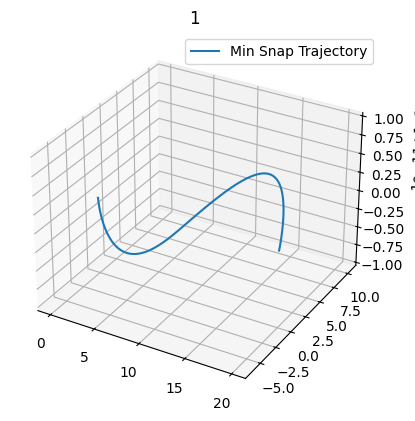

In [9]:
t = np.linspace(0, 16, 100)
#  Sample up to the 3rd order (Jerk) -----v
pva = ms.compute_trajectory_derivatives(polys, t, 3)
position = pva[0, ...]
velocity = pva[1, ...]
print(position)
ax = plt.figure().add_subplot(projection='3d')
ax.plot(position[:, 0], position[:, 1], position[:, 2], label="Min Snap Trajectory")
ax.legend()
plt.title("1")
plt.show()

In [4]:
t = np.linspace(0, 15, 100)
states, inputs = ms.compute_quadrotor_trajectory(
    polys,
    t,
    vehicle_mass=1.0, # Quadrotor weight
    yaw="velocity", # Align yaw angle to quadrotor velocity
    drag_params=ms.RotorDragParameters(0.1, 0.2, 1.0),
)